In [97]:
import os
import ntpath
import numpy as np
import matplotlib.pyplot as plt
import keras
import cv2
import pandas as pd
import random
import matplotlib.image as mpimg
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Convolution2D, MaxPooling2D, Dropout, Flatten, Dense

In [58]:
datadir = 'data'
columns = ['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed']
data = pd.read_csv(os.path.join(datadir,'driving_log.csv'), names= columns)
pd.set_option('display.max_colwidth', -1)
data.head(5)

,center,left,right,steering,throttle,reverse,speed
0,C:\Users\Vedansh\Desktop\SDC\Data\IMG\center_2019_07_24_13_27_37_710.jpg,C:\Users\Vedansh\Desktop\SDC\Data\IMG\left_2019_07_24_13_27_37_710.jpg,C:\Users\Vedansh\Desktop\SDC\Data\IMG\right_2019_07_24_13_27_37_710.jpg,0.0,0.0,0.0,0.000079
1,C:\Users\Vedansh\Desktop\SDC\Data\IMG\center_2019_07_24_13_27_37_815.jpg,C:\Users\Vedansh\Desktop\SDC\Data\IMG\left_2019_07_24_13_27_37_815.jpg,C:\Users\Vedansh\Desktop\SDC\Data\IMG\right_2019_07_24_13_27_37_815.jpg,0.0,0.0,0.0,0.000078
2,C:\Users\Vedansh\Desktop\SDC\Data\IMG\center_2019_07_24_13_27_37_914.jpg,C:\Users\Vedansh\Desktop\SDC\Data\IMG\left_2019_07_24_13_27_37_914.jpg,C:\Users\Vedansh\Desktop\SDC\Data\IMG\right_2019_07_24_13_27_37_914.jpg,0.0,0.0,0.0,0.000080
3,C:\Users\Vedansh\Desktop\SDC\Data\IMG\center_2019_07_24_13_27_38_015.jpg,C:\Users\Vedansh\Desktop\SDC\Data\IMG\left_2019_07_24_13_27_38_015.jpg,C:\Users\Vedansh\Desktop\SDC\Data\IMG\right_2019_07_24_13_27_38_015.jpg,0.0,0.0,0.0,0.000078
4,C:\Users\Vedansh\Desktop\SDC\Data\IMG\center_2019_07_24_13_27_38_118.jpg,C:\Users\Vedansh\Desktop\SDC\Data\IMG\left_2019_07_24_13_27_38_118.jpg,C:\Users\Vedansh\Desktop\SDC\Data\IMG\right_2019_07_24_13_27_38_118.jpg,0.0,0.0,0.0,0.000078


In [59]:
def path_leaf(path):
    head, tail = ntpath.split(path)
    return tail

data['center'] = data['center'].apply(path_leaf)
data['left'] = data['left'].apply(path_leaf)
data['right'] = data['right'].apply(path_leaf)
data.head(5)

,center,left,right,steering,throttle,reverse,speed
0,center_2019_07_24_13_27_37_710.jpg,left_2019_07_24_13_27_37_710.jpg,right_2019_07_24_13_27_37_710.jpg,0.0,0.0,0.0,0.000079
1,center_2019_07_24_13_27_37_815.jpg,left_2019_07_24_13_27_37_815.jpg,right_2019_07_24_13_27_37_815.jpg,0.0,0.0,0.0,0.000078
2,center_2019_07_24_13_27_37_914.jpg,left_2019_07_24_13_27_37_914.jpg,right_2019_07_24_13_27_37_914.jpg,0.0,0.0,0.0,0.000080
3,center_2019_07_24_13_27_38_015.jpg,left_2019_07_24_13_27_38_015.jpg,right_2019_07_24_13_27_38_015.jpg,0.0,0.0,0.0,0.000078
4,center_2019_07_24_13_27_38_118.jpg,left_2019_07_24_13_27_38_118.jpg,right_2019_07_24_13_27_38_118.jpg,0.0,0.0,0.0,0.000078


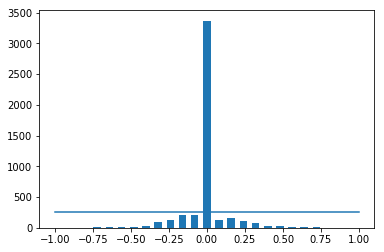

In [60]:
num_bins = 25
samples_per_bin = 250
hist, bins = np.histogram(data['steering'], num_bins)
center = (bins[:-1] + bins[1:]) * 0.5
plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))

removed : 3119
total : 4676
remaining : 1557


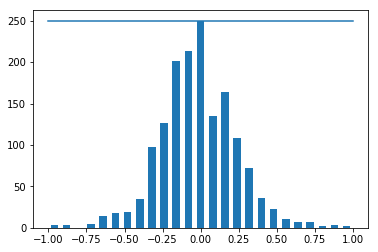

In [61]:
remove_list = []
for j in range(num_bins):
    list_a = []
    for i in range(len(data['steering'])):
        if data['steering'][i] >= bins[j] and data['steering'][i] <= bins[j+1]:
           list_a.append(i)  
    list_a = shuffle(list_a)
    list_a = list_a[samples_per_bin:]
    remove_list.extend(list_a)
    
    
print('removed : ' + str(len(remove_list)))
print('total : ' + str(len(data)))
data.drop(data.index[remove_list], inplace=True)
print('remaining : ' + str(len(data)))

hist, _ = np.histogram(data['steering'], (num_bins))
plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))

In [62]:
print(data.iloc[1])

def load_img_steering(datadir, df):
    image_path = []
    steering = []
    for i in range(len(data)):
        indexed_data = data.iloc[i]
        center, left, right = indexed_data[0], indexed_data[1], indexed_data[2]
        image_path.append(os.path.join(datadir, center.strip()))
        steering.append(float(indexed_data[3]))
    image_paths = np.asarray(image_path)
    steerings = np.asarray(steering)
    return image_paths, steerings

image_paths, steerings = load_img_steering(datadir + '/IMG', data)

center      center_2019_07_24_13_27_38_938.jpg
left        left_2019_07_24_13_27_38_938.jpg  
right       right_2019_07_24_13_27_38_938.jpg 
steering    0                                 
throttle    0                                 
reverse     0                                 
speed       7.78821e-05                       
Name: 12, dtype: object


In [73]:
X_train, X_test, y_train, y_test = train_test_split(image_paths, steerings, test_size=0.2, random_state=87)
print('Training samples : {}\n Test Samples : {}'.format(len(X_train), len(X_test)))

Training samples : 1245
 Test Samples : 312


Text(0.5, 1.0, 'Test Set')

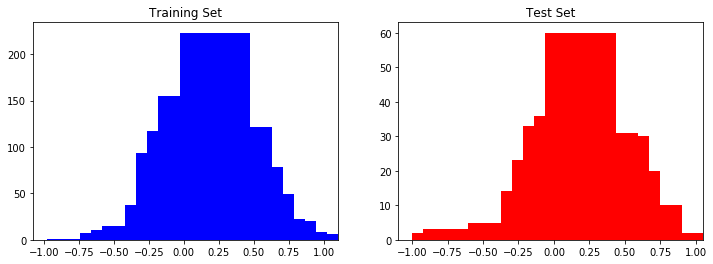

In [74]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))
axes[0].hist(y_train, bins=num_bins, width=0.5, color='blue')
axes[0].set_title('Training Set')
axes[1].hist(y_test, bins=num_bins, width=0.5, color='red')
axes[1].set_title('Test Set')

In [91]:
def img_preprocessing(img):
    img = mpimg.imread(img)
    img = img[60:140, :, :]
    img = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
    img = cv2.GaussianBlur(img, (3,3), 0)
    img = cv2.resize(img, (200, 66))
    img = img/255
    return img

Text(0.5, 1.0, 'Preprocessed Image')

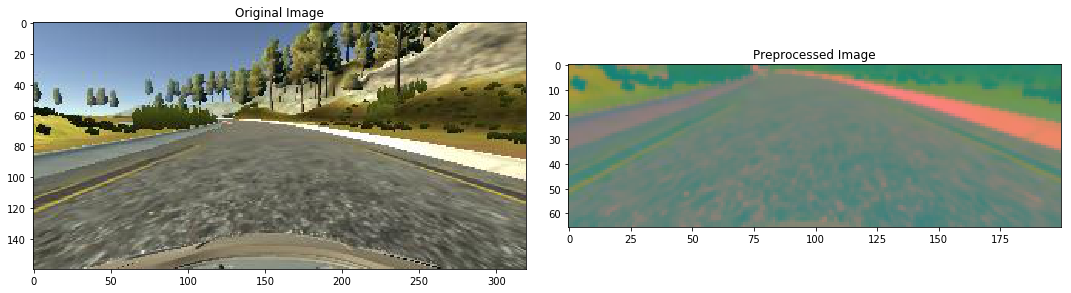

In [92]:
image = image_paths[100]
original_image = mpimg.imread(image)
preprocessed_image = img_preprocessing(image)

fig, axes = plt.subplots(1,2,figsize=(15,10))
fig.tight_layout()
axes[0].imshow(original_image)
axes[1].imshow(preprocessed_image)
axes[0].set_title('Original Image')
axes[1].set_title('Preprocessed Image')

In [93]:
X_train = np.array(list(map(img_preprocessing, X_train)))
X_test = np.array(list(map(img_preprocessing, X_test)))

(1245, 66, 200, 3)


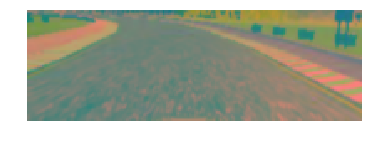

In [96]:
plt.imshow(X_train[random.randint(0, len(X_train)-1)])
plt.axis('off')
print(X_train.shape)

In [134]:
def nvidia_model():
    model = Sequential()
    model.add(Convolution2D(24, 5, 5, subsample=(2,2), input_shape=(66,200,3), activation='elu'))
    
    model.add(Convolution2D(36, 5, 5, subsample=(2,2), activation='elu'))
    model.add(Dropout(0.65))
    
    model.add(Convolution2D(48, 5, 5, subsample=(2,2), activation='elu'))
    model.add(Dropout(0.65))
    
    model.add(Convolution2D(64, 3, 3, activation='elu'))
    model.add(Dropout(0.65))
    
    model.add(Convolution2D(64, 3, 3, activation='elu'))
    model.add(Dropout(0.65))
    
    model.add(Flatten())
    
    model.add(Dense(100, activation='elu'))
    model.add(Dropout(0.65))
    
    model.add(Dense(50, activation='elu'))
    model.add(Dropout(0.65))
    
    model.add(Dense(10, activation='elu'))
    model.add(Dropout(0.65))
    
    model.add(Dense(1))
    
    optimizer = Adam(lr=1e-3)
    model.compile(loss = 'mse', optimizer=optimizer)
    return model

In [135]:
model = nvidia_model()
print(model.summary())

C:\Users\Vedansh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (5, 5), input_shape=(66, 200, ..., activation="elu", strides=(2, 2))`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Vedansh\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(36, (5, 5), activation="elu", strides=(2, 2))`
  """
C:\Users\Vedansh\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (5, 5), activation="elu", strides=(2, 2))`
  
C:\Users\Vedansh\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="elu")`
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Vedansh\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Conv2D

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_56 (Conv2D)           (None, 31, 98, 24)        1824      
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 14, 47, 36)        21636     
_________________________________________________________________
dropout_49 (Dropout)         (None, 14, 47, 36)        0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 5, 22, 48)         43248     
_________________________________________________________________
dropout_50 (Dropout)         (None, 5, 22, 48)         0         
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 3, 20, 64)         27712     
_________________________________________________________________
dropout_51 (Dropout)         (None, 3, 20, 64)         0         
__________

In [136]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), batch_size = 100, verbose=1, shuffle=1)

Train on 1245 samples, validate on 312 samples
Epoch 1/30
1245/1245 [==============================] - 5s 4ms/step - loss: 11.6340 - val_loss: 0.0825
Epoch 2/30
1245/1245 [==============================] - 3s 2ms/step - loss: 3.1640 - val_loss: 0.0740
Epoch 3/30
1245/1245 [==============================] - 3s 2ms/step - loss: 1.6054 - val_loss: 0.0763
Epoch 4/30
1245/1245 [==============================] - 3s 2ms/step - loss: 1.1524 - val_loss: 0.0740
Epoch 5/30
1245/1245 [==============================] - 3s 2ms/step - loss: 0.9295 - val_loss: 0.0734
Epoch 6/30
1245/1245 [==============================] - 3s 2ms/step - loss: 0.7713 - val_loss: 0.0737
Epoch 7/30
1245/1245 [==============================] - 3s 2ms/step - loss: 0.6612 - val_loss: 0.0760
Epoch 8/30
1245/1245 [==============================] - 3s 2ms/step - loss: 0.6157 - val_loss: 0.0760
Epoch 9/30
1245/1245 [==============================] - 3s 2ms/step - loss: 0.5435 - val_loss: 0.0734
Epoch 10/30
1245/1245 [===========

Text(0.5, 0, 'Epoch')

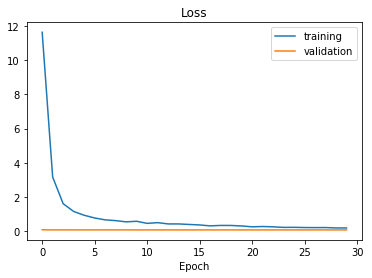

In [137]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('Epoch')

In [139]:
model.save('car.h5')